In [1]:
%pylab inline
import numpy as np
import scipy as sc
import scipy.ndimage as ndi
import pylab as pl
import matplotlib as mpl
from IPython import display
from itertools import islice
rc("image", cmap="gray")
from dlinputs import tarrecords, gopen, utils, filters, sqlitedb
import dltrainers as dlt
from dltrainers import flex, layers
import torch
from torch import nn
from torch.autograd import Variable

Populating the interactive namespace from numpy and matplotlib


# Flex Models

In [2]:
model = nn.Sequential(
    flex.Conv2d(64, 3),
    nn.MaxPool2d(2),
    flex.Conv2d(64, 3),
    nn.MaxPool2d(2),
    layers.Flat(),
    flex.Linear(100),
    nn.ReLU(),
    flex.Linear(10),
    nn.Sigmoid()
)
model

Sequential(
  (0): Flex:None
  (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (2): Flex:None
  (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (4): Flat
  (5): Flex:None
  (6): ReLU()
  (7): Flex:None
  (8): Sigmoid()
)

In [3]:
x = torch.randn(10, 1, 28, 28)
model.forward(Variable(x))
model

Sequential(
  (0): Flex:Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (2): Flex:Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (4): Flat
  (5): Flex:Linear(in_features=1600, out_features=100, bias=True)
  (6): ReLU()
  (7): Flex:Linear(in_features=100, out_features=10, bias=True)
  (8): Sigmoid()
)

# Trainers

Trainers allow quick and simple training of models. Unlike other deep learning frameworks, trainers are just temporary scaffolds for training a model; that is, they are wrapped around a model, used for training, and then discarded, leaving only the trained model.

In addition, trainers do not invert control; that is, you write a standard stochastic gradient descent training loop. This is not only less mysterious than burying the loop inside some framework, it also gives a great deal more flexibility in terms of training logic.

Trainers also provide convenient logic for dynamic displays inside iPython notbooks (`trainer.display_loss()`).

In [4]:
import dltrainers as dlt
trainer = dlt.ImageClassifierTrainer(model)
trainer.set_lr(1e-2)

In [5]:
source = sqlitedb.sqlitedb("testdata/sample.db", epochs=5000)
pipeline = filters.compose(
    filters.map(image=utils.pilgray, cls=int),
    filters.batched(17),
    filters.sliced(0, 1000)
)
data = pipeline(source)
data.next().keys()

['image', 'inx', '__epoch__', 'cls']

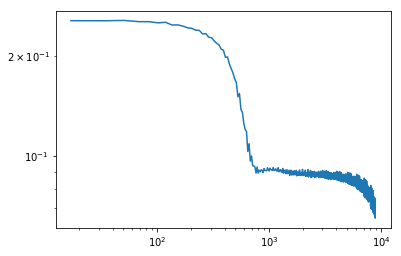

In [ ]:
for sample in data:
    inputs = expand_dims(sample["image"], 3)
    classes = sample["cls"]
    outputs, loss = trainer.train_batch(inputs, classes)
    clf()
    xscale('log'); yscale('log')
    trainer.plot_loss()
    dlt.update_display()